In [2]:
import pandas as pd
final_train = pd.read_csv('/Users/apollo_tong/Downloads/final_train.csv')
final_test = pd.read_csv('/Users/apollo_tong/Downloads/final_test.csv')

In [3]:
#train set
train_Y = final_train['is_churn']
train_X = final_train.drop(['is_churn', 'msno'], axis=1)
#test set
test_Y = final_test['is_churn']
test_X = final_test.drop(['is_churn', 'msno'], axis=1)

In [ ]:
test

In [31]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
#standard scale
sc = StandardScaler()
sc.fit_transform(train_X)
X_train_std = sc.transform(train_X)

sc.fit_transform(test_X)
X_test_std = sc.transform(test_X)


In [4]:
from sklearn.model_selection import train_test_split
# from skopt.space import Real,Integer,Categorical
# from skopt.utils import use_named_args
# from skopt import gp_minimize
from sklearn.metrics import log_loss
# from skopt.space import Real, Integer,Categorical
# from skopt.utils import use_named_args
from sklearn.linear_model import LogisticRegression
import numpy as np 
C_ = [ 0.01, 0.1, 1, 10, 100]
penalty_ = ['l1','l2']
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(train_X,train_Y)
loss = np.zeros((2,5))
for i in range(len(C_)):
    for j in range(len(penalty_)):
        LR = LogisticRegression(C = C_[i] , penalty = penalty_[j]).fit(x_train_cv, y_train_cv)
        y_predict = LR.predict_proba(x_test_cv)
        print(log_loss(y_test_cv,y_predict) )
        loss[j,i] = log_loss(y_test_cv,y_predict) 
        

0.27689852843683554
0.27688130687275875
0.27456204759661634
0.2763224475947298
0.27383870083617395
0.27644359213471525
0.2737693656105546
0.27637746696544657
0.27376298016889555
0.2762476913501857


In [12]:
print(X_train_std.shape)
print(train_Y.shape)
print(train_X.shape)

(1082190, 59)
(1082190,)
(1082190, 59)


In [14]:
from sklearn.model_selection import train_test_split
from skopt.space import Real,Integer,Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.metrics import log_loss
from skopt.space import Real, Integer,Categorical
from skopt.utils import use_named_args
from sklearn.linear_model import LogisticRegression

x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(X_train_std,train_Y)
space  = [Real(0.1,20, name='C'),
         Categorical(['l1','l2'], name='penalty')]
@use_named_args(space)
def loss_function(**params):
    LR = LogisticRegression(**params).fit(x_train_cv, y_train_cv)
    y_predict = LR.predict_proba(x_test_cv)
    return log_loss(y_test_cv,y_predict)
    
result = gp_minimize(loss_function,space,n_calls=10,random_state=0)

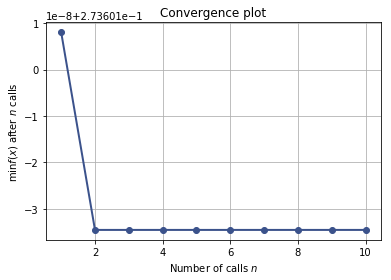

In [15]:
from skopt.plots import plot_convergence
import matplotlib.pyplot as plt
plot_convergence(result)
plt.show()

In [16]:
result

          fun: 0.2736009654378395
    func_vals: array([0.27360101, 0.27360097, 0.2736266 , 0.27361828, 0.27361757,
       0.27362936, 0.27360108, 0.27360111, 0.27360109, 0.27360145])
       models: [GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * Matern(length_scale=[1, 1], nu=2.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=2, noise='gaussian', normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=209652396)]
 random_state: <mtrand.RandomState object at 0x1a1c03e0d8>
        space: Space([Real(low=0.1, high=20, prior='uniform', transform='normalize'),
       Categorical(categories=('l1', 'l2'), prior=None)])
        specs: {'args': {'n_jobs': 1, 'kappa': 1.96, 'xi': 0.01, 'n_restarts_optimizer': 5, 'n_points': 10000, 'callback': None, 'verbose': False, 'random_state': <mtrand.RandomState object at 0x1a1c03e0d8>, 'y0': None, 'x0': None, 'acq_optimizer': 'auto', 'acq_func': 'gp_hedge', 'n_random_starts': 10, 'n_ca

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(X_train_std,train_Y)
# model_lr = LogisticRegression(C = 7.428, penalty = 'l2').fit(x_train_cv, y_train_cv)
# model_lr = LogisticRegression(C = 17.17, penalty = 'l2').fit(train_X, train_Y)
model_lr = LogisticRegression(C = 17.17, penalty = 'l2').fit(X_train_std, train_Y)
y_predict = model_lr.predict_proba(X_test_std)

In [33]:
result = y_predict[:,1]
print(y_predict.shape)
print(submission.shape)

(907471, 2)
(907471, 2)


In [34]:
submission = pd.read_csv('/Users/apollo_tong/Desktop/data/sample_submission_v2.csv')

In [35]:
submission['is_churn'] = result

In [36]:
submission.to_csv('/Users/apollo_tong/Desktop/data/sample_submission_v2.csv',index = False)

In [37]:
y_predict

array([[0.89109401, 0.10890599],
       [0.99454926, 0.00545074],
       [0.94007468, 0.05992532],
       ...,
       [0.93757459, 0.06242541],
       [0.99192093, 0.00807907],
       [0.99230967, 0.00769033]])

In [38]:
y_predict

array([[0.89109401, 0.10890599],
       [0.99454926, 0.00545074],
       [0.94007468, 0.05992532],
       ...,
       [0.93757459, 0.06242541],
       [0.99192093, 0.00807907],
       [0.99230967, 0.00769033]])

### 